# Ejercicio 3

El archivo Vinos.csv tiene información referida a 13 características químicas y/o visuales de varias muestras de vinos pertenecientes a 3 clases distintas.

Utilice el 80% de los ejemplos del archivo Vinos.csv para entrenar un multiperceptrón que sea capaz que distinguir entre las 3 clases de vinos. Observe la tasa de acierto obtenida sobre el 20% restante.

Fuente de datos: Wine Data Set - https://archive.ics.uci.edu/ml/datasets/wine

In [1]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [14]:
def open_file(path, delimiter=';'):
    # Detectar la codificación del archivo
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']
    
    # Leer el archivo CSV usando el delimitador correcto
    df = pd.read_csv(path, encoding=encoding, delimiter=delimiter)
    
    return df

df = open_file("../Datos/Vinos.csv")
# df = df.select_dtypes(include=np.number)
# df

In [3]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,0:1])    # recupera solo la última columna (es la clase)
binarizer = preprocessing.LabelBinarizer()
Y_raw = binarizer.fit_transform(Y_raw)

In [4]:

scaler = preprocessing.StandardScaler()
X_raw  = scaler.fit_transform(X_raw)

# %% Separa ejemplos para enternamiento y testeo

TEST_SIZE = 0.2# proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))


Datos de Entrenamiento: 142   Datos de Testeo: 36


In [5]:
FunH = 'relu'   # identity logistic tanh relu
ocultas = (8)

alfa = 0.005
CotaError = 1.0e-5
MAX_ITE = 2500

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                           solver='sgd', activation=FunH, tol=CotaError,
                       verbose=False).fit(X_train, Y_train)

modelo.out_activation_ = 'softmax'

#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

comparacion = (Y_pred == Y_train)
# Contar la cantidad de filas con todos los valores = True
comparacion = np.all(comparacion, axis=1)
# Calcular la cantidad de filas con todos los valores = True
comparacion = np.sum(comparacion)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(comparacion).sum()/len(Y_it)) )
print(f"Score: {score}")

Efectividad:  98.59%
Score: 0.9859154929577465


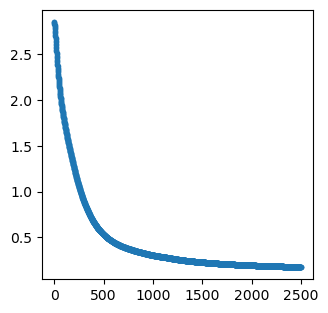

In [7]:

## https://www.youtube.com/watch?v=GsYOgr2K4vU

import matplotlib.pyplot as plt
plt.figure(figsize=(3.5, 3.5))
plt.plot(modelo.loss_curve_, ".-") ### funcion de perdida por iteracion
plt.show()